In [28]:
import numpy as np

Total de títulos en OpenAlex: 134
Total de títulos en Scopus: 108
Total de títulos duplicados: 77
Total de títulos en Scopus que no están en OpenAlex: 31
Total de títulos en OpenAlex que no están en Scopus: 57


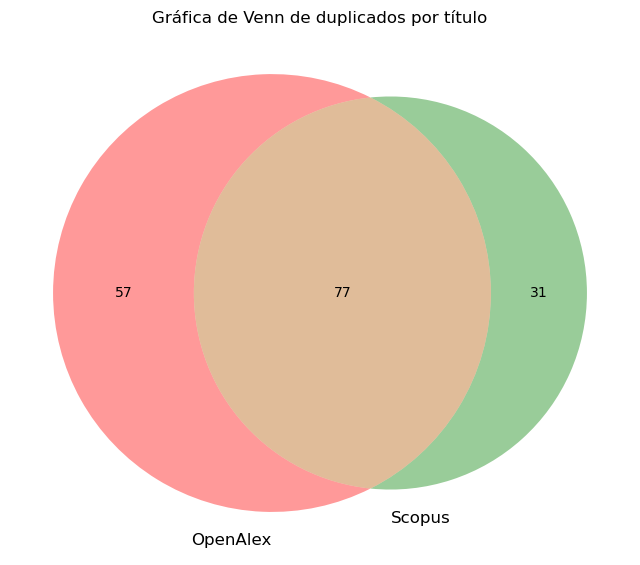

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Leer los archivos CSV
df_openalex = pd.read_csv('OpenAlex_seismic_waves_both.csv')
df_scopus = pd.read_csv('Scopus_seismic_waves_both.csv')

# Crear conjuntos de títulos para cada DataFrame
set_openalex = set(df_openalex['Title'])
set_scopus = set(df_scopus['Title'])

# Identificar títulos duplicados
duplicated_titles = set_openalex & set_scopus

# DataFrame con títulos duplicados (desde OpenAlex)
duplicated_df = df_openalex[df_openalex['Title'].isin(duplicated_titles)]

# Títulos únicos en cada base de datos
titles_in_openalex_not_in_scopus = set_openalex - set_scopus
titles_in_scopus_not_in_openalex = set_scopus - set_openalex

# Guardar títulos duplicados
duplicated_titles_df = pd.DataFrame(sorted(duplicated_titles), columns=['Title'])
duplicated_titles_df.to_csv('duplicated_titles.csv', index=False)

# Guardar títulos únicos de OpenAlex
openalex_unique_df = df_openalex[
    df_openalex['Title'].isin(titles_in_openalex_not_in_scopus)
][['Title']]
openalex_unique_df.to_csv('titles_openalex_not_in_scopus.csv', index=False)

# Guardar títulos únicos de Scopus
scopus_unique_df = df_scopus[
    df_scopus['Title'].isin(titles_in_scopus_not_in_openalex)
][['Title']]
scopus_unique_df.to_csv('titles_scopus_not_in_openalex.csv', index=False)

# Imprimir totales
print(f"Total de títulos en OpenAlex: {len(set_openalex)}")
print(f"Total de títulos en Scopus: {len(set_scopus)}")
print(f"Total de títulos duplicados: {len(duplicated_titles)}")
print(f"Total de títulos en Scopus que no están en OpenAlex: {len(titles_in_scopus_not_in_openalex)}")
print(f"Total de títulos en OpenAlex que no están en Scopus: {len(titles_in_openalex_not_in_scopus)}")

# Crear la gráfica de Venn
plt.figure(figsize=(8, 8))
venn2([set_openalex, set_scopus], ('OpenAlex', 'Scopus'))
plt.title('Gráfica de Venn de duplicados por título')
plt.show()


In [22]:
df_manual = pd.read_csv('Manually filtered.csv')

# Seleccionar columna correcta de revistas
item_types = df_manual['Item Type'].dropna()
 
 
# Contar ocurrencias
item_type_counts = item_types.value_counts()

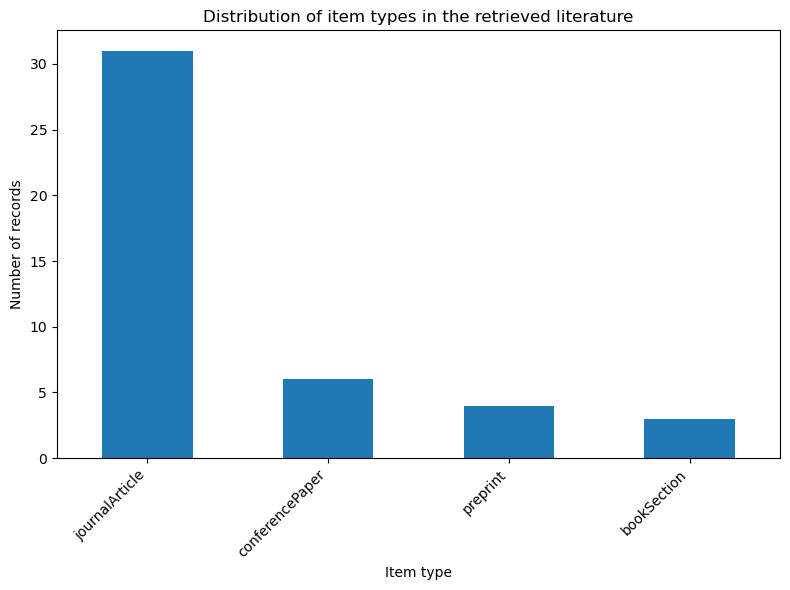

In [23]:
plt.figure(figsize=(8, 6))
item_type_counts.plot(kind='bar')
plt.ylabel('Number of records')
plt.xlabel('Item type')
plt.title('Distribution of item types in the retrieved literature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

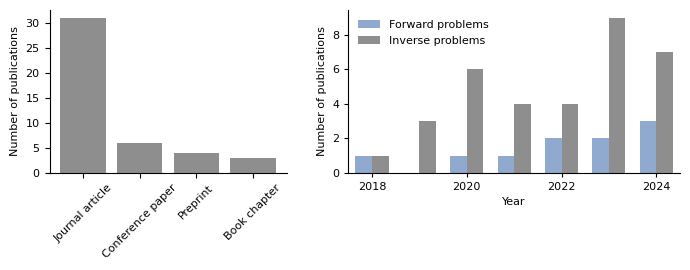

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# === Colors and style ======================================
color_forward = '#2255a080'   # ML-like blue
color_inverse = '#8e8e8e'     # gray
bar_width = 0.35

# === Read data =============================================
df_manual_forward = pd.read_csv('Manually_filtered_forward.csv')
df_manual_inverse = pd.read_csv('Manually_filtered_inverse.csv')

# === Combine and deduplicate ===============================
combined_df = pd.concat([df_manual_forward, df_manual_inverse], ignore_index=True)
combined_df_unique = combined_df.drop_duplicates(subset='Title')

# === Normalize Item Type labels ============================
item_type_map = {
    'journalArticle': 'Journal article',
    'conferencePaper': 'Conference paper',
    'preprint': 'Preprint',
    'bookSection': 'Book chapter',
    'thesis': 'Thesis',
    'report': 'Report'
}

combined_df_unique['Item Type (clean)'] = (
    combined_df_unique['Item Type']
    .map(item_type_map)
    .fillna(combined_df_unique['Item Type'])
)

# === Item type counts =====================================
item_type_counts = combined_df_unique['Item Type (clean)'].value_counts()

# === Count publications per year ===========================
forward_counts = df_manual_forward['Publication Year'].value_counts().sort_index()
inverse_counts = df_manual_inverse['Publication Year'].value_counts().sort_index()

years = sorted(set(forward_counts.index).union(inverse_counts.index))
forward_vals = [forward_counts.get(y, 0) for y in years]
inverse_vals = [inverse_counts.get(y, 0) for y in years]
x = np.array(years)

# === Figure layout =========================================
fig = plt.figure(figsize=(7.0, 2.5), constrained_layout=True)
gs = GridSpec(1, 2, figure=fig, width_ratios=[1, 1.4])
fig.set_constrained_layout_pads(w_pad=0.15, h_pad=0.00)

# === Left panel: Item types ================================
ax1 = fig.add_subplot(gs[0, 0])
ax1.bar(item_type_counts.index, item_type_counts.values, color=color_inverse)

ax1.set_ylabel("Number of publications", fontsize=8)
#ax1.set_xlabel("Item type", fontsize=9)
ax1.tick_params(axis='x', rotation=45, labelsize=8)
ax1.tick_params(axis='y', labelsize=8)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.grid(False)

# === Right panel: Forward vs Inverse =======================
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(x - bar_width / 2, forward_vals,
        width=bar_width, color=color_forward, label='Forward problems')
ax2.bar(x + bar_width / 2, inverse_vals,
        width=bar_width, color=color_inverse, label='Inverse problems')

ax2.set_xlabel("Year", fontsize=8)
ax2.set_ylabel("Number of publications", fontsize=8)

ax2.set_xticks(np.arange(min(years), max(years) + 1, 2))
ax2.set_xlim(min(years) - 0.5, max(years) + 0.5)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')

ax2.tick_params(axis='both',
                labelsize=8,
                direction='out',
                length=3,
                width=0.8,
                color='black')

ax2.legend(frameon=False, fontsize=8, loc='upper left')
ax2.grid(False)
plt.savefig('figs/item_types_and_publications_per_year.pdf', dpi=300)
plt.show()
